In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

import torch
from torch.autograd import Function
from torchvision import datasets, transforms
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
train_range = 150
test_range = 50

In [ ]:
class CSVDataset(torch.utils.data.Dataset):
    """ Diabetes dataset."""

    # Initialize your data, download, etc.
    def __init__(self):
        xy = np.loadtxt('/content/gdrive/MyDrive/Colab Notebooks/양자 해커톤/dataset/other data/train_set_150/SDES_train_150.csv',
                        delimiter=',', dtype=np.float32)
        self.len = train_range

        self.x_data = torch.from_numpy(xy[:train_range, 1:17])
        self.y_data = torch.from_numpy(xy[:train_range, 0])
        
    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

    def __len__(self):
        return self.len


dataset = CSVDataset()
train_loader = torch.utils.data.DataLoader(dataset=dataset,
                          batch_size=8,
                          shuffle=False,
                            drop_last = True)


(150, 49)
torch.Size([150, 16])


In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.input = nn.Linear(16, 64)
        self.dropout = nn.Dropout2d(p=0.2)
        self.fc1 = nn.Linear(64, 32)
        self.fc2 = nn.Linear(32, 1)

    def forward(self, x):
        x = F.relu(self.input(x))
        x = self.dropout(x)

        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        
        x = torch.sigmoid(x)

        return x 


In [ ]:
model = Net()
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_func = nn.BCELoss()


epochs = 20
loss_list = []
model.train()

ts = time.time()
for epoch in range(epochs):
    total_loss = []
    for batch_idx, x in enumerate(train_loader):
        data, target = x
        target = target.unsqueeze(1)
        optimizer.zero_grad()
        
        # Forward pass
        output = model(data)

        # Calculating loss
        loss = loss_func(output, target)

        # Backward pass
        loss.backward()

        # Optimize the weights
        optimizer.step()


        total_loss.append(loss.item())
    loss_list.append(sum(total_loss)/len(total_loss))
    print('Training [{:.0f}%]\tLoss: {:.4f}'.format(100. * (epoch + 1) / epochs, loss_list[-1]))

te = time.time()

print("runtime: ", te-ts)

Training [5%]	Loss: 0.7006
Training [10%]	Loss: 0.6921
Training [15%]	Loss: 0.6859
Training [20%]	Loss: 0.6799
Training [25%]	Loss: 0.6696
Training [30%]	Loss: 0.6593
Training [35%]	Loss: 0.6451
Training [40%]	Loss: 0.6213
Training [45%]	Loss: 0.5902
Training [50%]	Loss: 0.5768
Training [55%]	Loss: 0.5449
Training [60%]	Loss: 0.5265
Training [65%]	Loss: 0.4893
Training [70%]	Loss: 0.4616
Training [75%]	Loss: 0.4249
Training [80%]	Loss: 0.4272
Training [85%]	Loss: 0.3899
Training [90%]	Loss: 0.3710
Training [95%]	Loss: 0.3349
Training [100%]	Loss: 0.2949
runtime:  0.5058138370513916


Text(0, 0.5, 'Neg Log Likelihood Loss')

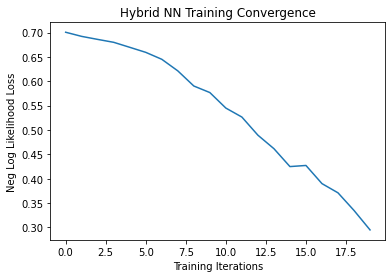

In [ ]:
plt.plot(loss_list)
plt.title('Hybrid NN Training Convergence')
plt.xlabel('Training Iterations')
plt.ylabel('Neg Log Likelihood Loss')

In [ ]:
class CSVDataset(torch.utils.data.Dataset):
    """ Diabetes dataset."""

    # Initialize your data, download, etc.
    def __init__(self):
        xy = np.loadtxt('/content/gdrive/MyDrive/Colab Notebooks/양자 해커톤/dataset/other data/test_set/SDES_test_50.csv',
                        delimiter=',', dtype=np.float32)
        self.len = test_range
        self.x_data = torch.from_numpy(xy[:test_range, 1:17])
        self.y_data = torch.from_numpy(xy[:test_range, 0])

    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

    def __len__(self):
        return self.len


dataset = CSVDataset()
test_loader = torch.utils.data.DataLoader(dataset=dataset,
                          batch_size=8,
                          shuffle=False,
                            drop_last=True)

In [ ]:
import math
model.eval()
with torch.no_grad():
    
    correct = 0

    for batch_idx, (data, target) in enumerate(test_loader):
        output = model(data)
        pred = output
        target = target.unsqueeze(1)
        
        for i in range(8):
            if (output[i] > 0.5):
                pred[i] = math.ceil(output[i])
            else:
                pred[i] = math.floor(output[i])

        correct += pred.eq(target.view_as(pred)).sum().item()
        loss = loss_func(output, target)
        total_loss.append(loss.item())
    print('Performance on test data:\n\tLoss: {:.4f}\n\tAccuracy: {:.1f}%'.format(
        sum(total_loss) / len(total_loss),
        correct / len(dataset) * 100)
        )

Performance on test data:
	Loss: 7.5129
	Accuracy: 68.0%
